### Mini batch Task01
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/diamond.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
df = df.drop(labels=['Unnamed: 0'], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.cut.value_counts() # Label Encoding

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [5]:
df.color.value_counts() # One_Hot Encoding

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [6]:
df.clarity.value_counts() # One_Hot_Encoding

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

pre_df = df.copy()
columns = ['cut' ,'clarity']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_df[column])
    label_encoders[column] = encoder.classes_
    pre_df[column] = result

label_encoders

{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

In [8]:
pre_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43


In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# columns = ['color' , 'clarity']

one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_df[['color']])

pre_df = pd.concat([pre_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis=1)
pre_df

,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [10]:
pre_df = pre_df.drop(labels=['color'], axis=1)
pre_df

,carat,cut,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [11]:
pre_df.columns = ['carat' , 'cut' , 'clarity' ,
                  'depth' , 'table' , 'price' ,
                  'x', 'y', 'z',
                 'd', 'e' ,'f', 'g' , 'h', 'i' ,'j']

pre_df

,carat,cut,clarity,depth,table,price,x,y,z,d,e,f,g,h,i,j
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'e'}>, <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'j'}>]],
      dtype=object)

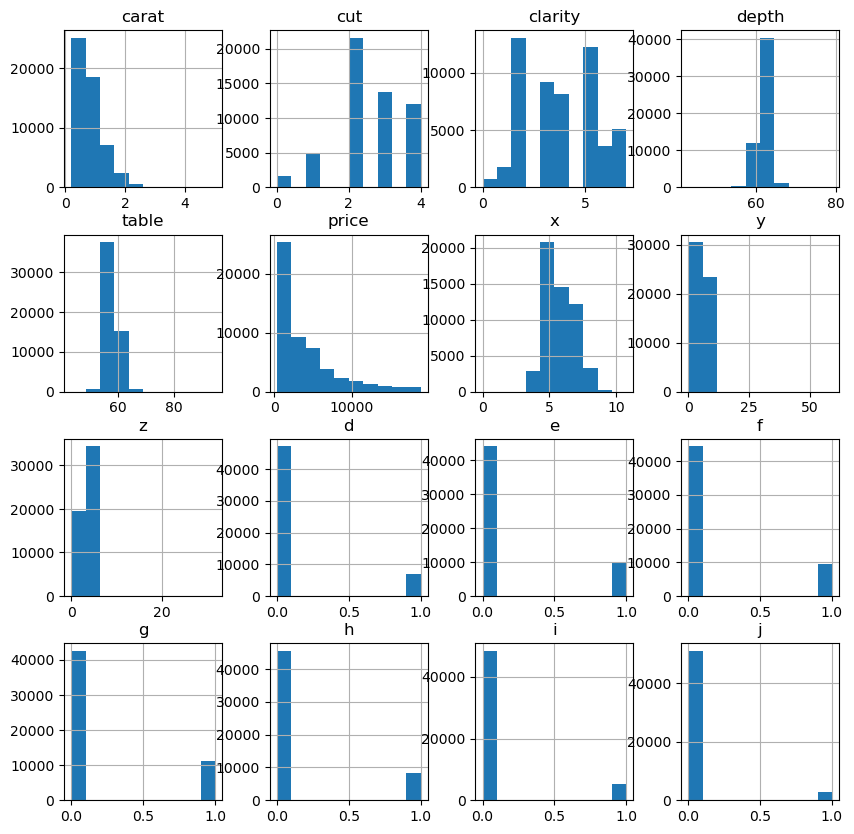

In [12]:
pre_df.hist(figsize=(10, 10))

<Axes: >

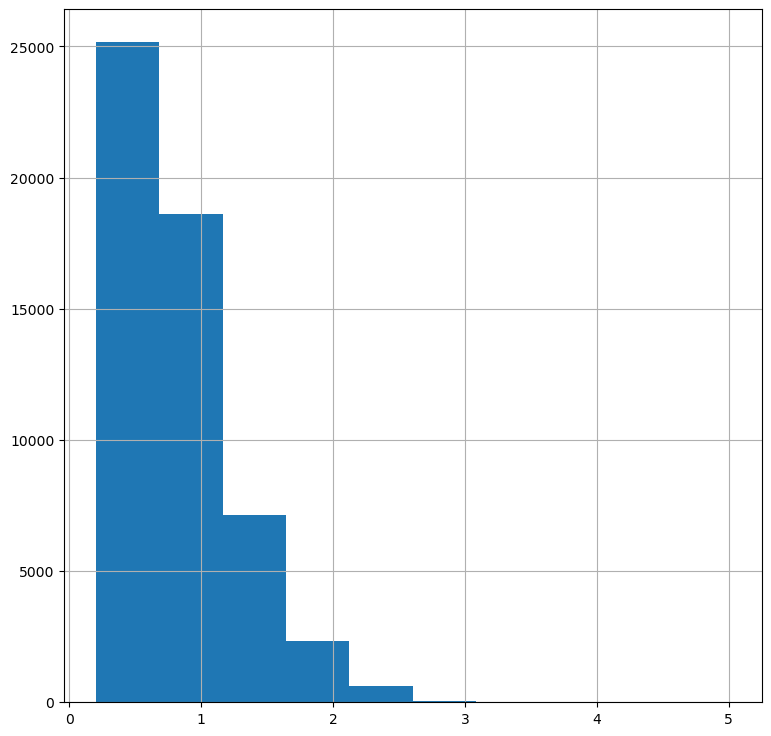

In [14]:
pre_df['carat'].hist(figsize=(9,9))

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'e'}>, <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'j'}>]],
      dtype=object)

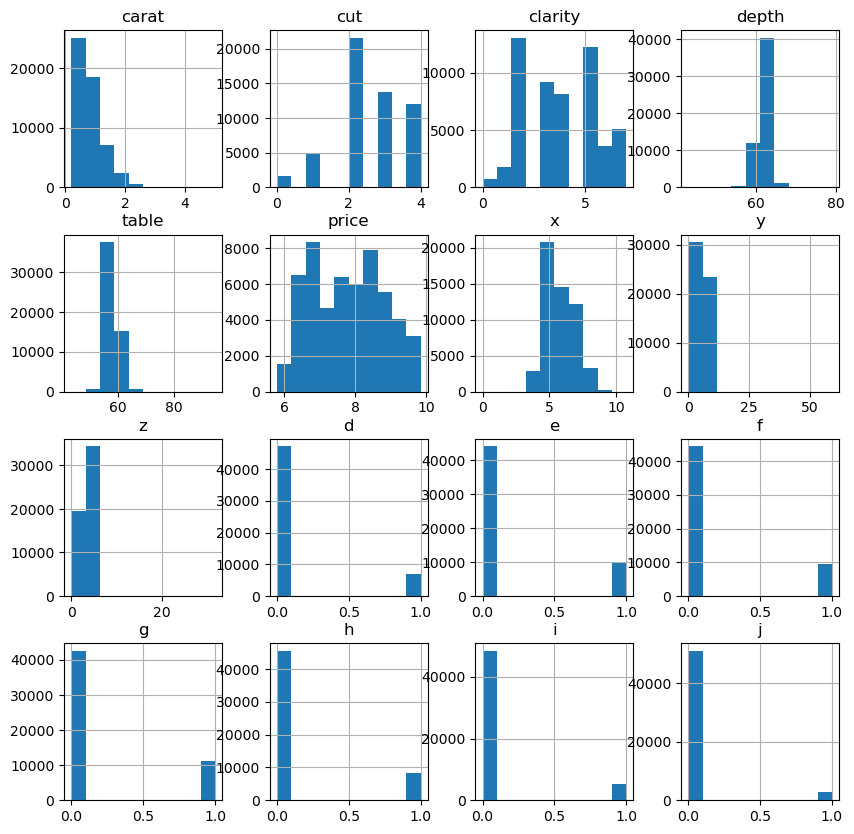

In [15]:
pre_df.loc[:, 'price'] = np.log1p(pre_df['price'])
pre_df.hist(figsize=(10,10))

In [32]:
pre_df.corr()['price'].sort_values(ascending=False)[1:]

x        0.958027
y        0.936190
z        0.935233
carat    0.920252
Name: price, dtype: float64

In [17]:
columns = ['x', 'y', 'z', 'carat' , 'price']
pre_df = pre_df.loc[:, columns]
pre_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
53938,6.15,6.12,3.74,0.86,7.922261
53939,5.83,5.87,3.64,0.75,7.922261
53940,5.79,5.74,3.49,0.71,7.921898
53941,5.74,5.73,3.43,0.71,7.921898


<Axes: >

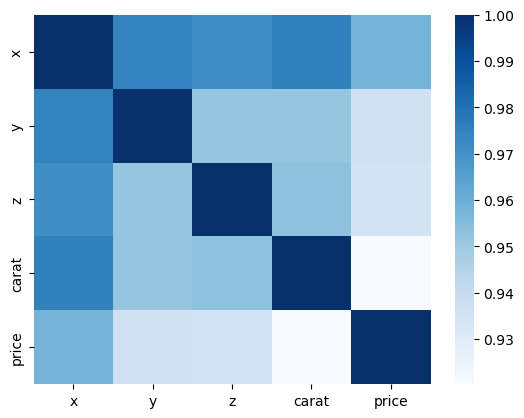

In [43]:
import seaborn as sns
corr = pre_df.corr()
corr
sns.heatmap(corr, cmap="Blues"

In [18]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(150)

features, targets = pre_df.iloc[: , :-1] , pre_df.iloc[:, -1]

X_train , X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=150)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1 , 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1 , 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True) # 미니 배치 구축 

l_r = LinearRegressionModel(4)

optimizer = SGD(l_r.parameters(), lr=0.0001)

epochs = 100

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 10/100, Batch: 1/432, W1: 0.7044, W2: 0.6184, W3: -0.0794, W4: 0.0463, b: 0.358
loss: 0.2571
Epoch: 10/100, Batch: 2/432, W1: 0.7042, W2: 0.6182, W3: -0.0795, W4: 0.0463, b: 0.358
loss: 0.3071
Epoch: 10/100, Batch: 3/432, W1: 0.7042, W2: 0.6183, W3: -0.0795, W4: 0.0462, b: 0.358
loss: 0.2328
Epoch: 10/100, Batch: 4/432, W1: 0.7043, W2: 0.6183, W3: -0.0795, W4: 0.0462, b: 0.358
loss: 0.2398
Epoch: 10/100, Batch: 5/432, W1: 0.7041, W2: 0.6182, W3: -0.0795, W4: 0.0462, b: 0.358
loss: 0.3905
Epoch: 10/100, Batch: 6/432, W1: 0.704, W2: 0.6181, W3: -0.0796, W4: 0.0461, b: 0.358
loss: 0.2928
Epoch: 10/100, Batch: 7/432, W1: 0.7041, W2: 0.6181, W3: -0.0796, W4: 0.0461, b: 0.358
loss: 0.3423
Epoch: 10/100, Batch: 8/432, W1: 0.704, W2: 0.6181, W3: -0.0796, W4: 0.046, b: 0.3581
loss: 0.3371
Epoch: 10/100, Batch: 9/432, W1: 0.7041, W2: 0.6181, W3: -0.0796, W4: 0.046, b: 0.3581
loss: 0.31
Epoch: 10/100, Batch: 10/432, W1: 0.7041, W2: 0.6181, W3: -0.0796, W4: 0.046, b: 0.3581
loss: 0.3184
Epo

In [25]:
X_train.values

<function Tensor.values>

In [22]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [23]:
# detach -> numpy 배열로 변환 
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [24]:
get_evaluation(y_test, prediction)

MSE: 0.1027, RMSE: 0.3205, MSLE: 0.0017, RMSLE: 0.0410


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=150)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [27]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
print('b: {:.4f}, MSLE: {:.4f}, MSE: {:.4f}'\
      .format(l_r.intercept_, mean_squared_log_error(y_test, prediction), mean_squared_error(y_test, prediction)))

W1: 0.9902, W2: 0.0322, W3: 0.1530, W4: -0.6082, b: 1.8718, MSLE: 0.0011, MSE: 0.0745


In [28]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [29]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
print('b: {:.4f}'\
      .format(l_r.intercept_))
get_evaluation(y_test, prediction)

W1: 0.9902, W2: 0.0322, W3: 0.1530, W4: -0.6082, b: 1.8718
MSE: 0.0745, RMSE: 0.2729, MSLE: 0.0011, RMSLE: 0.0332


In [30]:
H

tensor([[10.0334],
        [ 7.3322],
        [ 8.6153],
        ...,
        [ 7.6311],
        [ 6.0913],
        [ 6.3060]], grad_fn=<AddmmBackward0>)

In [31]:
print('=' * 40)

print(('정답', '예측'))
for eval in zip(y_train, H):
    print(eval)

('정답', '예측')
(7.602900462204755, tensor([10.0334], grad_fn=<UnbindBackward0>))
(8.32093496888341, tensor([7.3322], grad_fn=<UnbindBackward0>))
(8.344980368770571, tensor([8.6153], grad_fn=<UnbindBackward0>))
(6.747586526829315, tensor([8.6578], grad_fn=<UnbindBackward0>))
(7.393263094763838, tensor([9.4077], grad_fn=<UnbindBackward0>))
(8.929435283803425, tensor([8.5184], grad_fn=<UnbindBackward0>))
(7.105786129481271, tensor([8.9108], grad_fn=<UnbindBackward0>))
(8.596189197642735, tensor([8.8249], grad_fn=<UnbindBackward0>))
(8.595264726836392, tensor([6.5050], grad_fn=<UnbindBackward0>))
(7.592870287844818, tensor([6.0215], grad_fn=<UnbindBackward0>))
(9.718301898127523, tensor([7.4061], grad_fn=<UnbindBackward0>))
(7.086737934510577, tensor([7.7326], grad_fn=<UnbindBackward0>))
(6.739336627357174, tensor([10.2183], grad_fn=<UnbindBackward0>))
(7.52294091807237, tensor([6.8100], grad_fn=<UnbindBackward0>))
(6.331501849893691, tensor([6.8462], grad_fn=<UnbindBackward0>))
(6.665683717

### 💡 OLS (Ordinary Least Square)
- 최소제곱법 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 여러 통계 테스트를 수행하는 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value) : 해당 독립변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미 하다 라는 것을 뜻한다.
- Durbin-Watson : 보통 1.5에서 2.5 사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sup>2</sup>(R-squared) 값을 유지 또는 개선하는 방향으로만 수행해야 한다.
- coef가 높을수록 좋다.

### VIF(Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우, 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src='./images/multicollinearity.png'>